In [1]:
using PyCall, PyPlot
Image = PyCall.pyimport("PIL").Image
plt = PyPlot.matplotlib.pyplot

PyObject <module 'matplotlib.pyplot' from '/home/user/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/pyplot.py'>

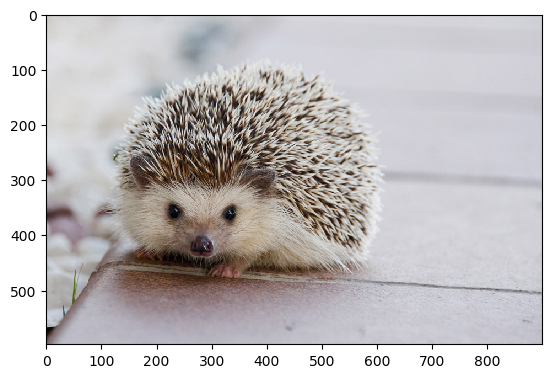

PyObject <matplotlib.image.AxesImage object at 0x7f80d9f9ffd0>

In [2]:
image_file_path = "../data/gahag-0059907781-1.jpg"
img = Image.open(image_file_path)
plt.imshow(img)

In [3]:
using HTTP

r = HTTP.request("GET", "https://farm1.static.flickr.com/201/496754650_999d27390c.jpg")
r.body

55559-element Array{UInt8,1}:
 0xff
 0xd8
 0xff
 0xe0
 0x00
 0x10
 0x4a
 0x46
 0x49
 0x46
 0x00
 0x01
 0x02
    ⋮
 0x0f
 0xf2
 0xaf
 0xf5
 0x35
 0x92
 0xca
 0xb4
 0x70
 0xbf
 0xff
 0xd9

## includeとimport, usingの違い

- **include**
    - 指定ファイルの中身をそのままその場所に展開する
- **import**
    - `Module`キーワードで定義されたモジュールの中身を参照可能にする（`module_name.module_member`という形式）
    - 別ファイルで定義されたモジュールは参照できないため先に`include`する
    - 同一階層のモジュールであればimportしなくても参照できるため、基本的に階層の異なるモジュールを参照する場合に使う
- **using**
    - ほぼ`import`と同じ
    - モジュールブロック内で`export`宣言されている変数は`module_name`を省略して利用できるようになる

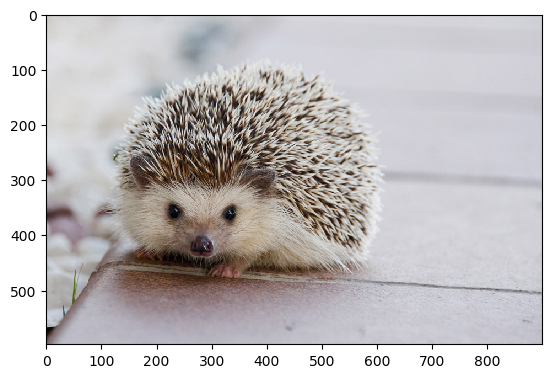

PyObject <matplotlib.image.AxesImage object at 0x7f80d49361d0>

In [10]:
include("./PyImage.jl")
img = PyImage.open("../data/gahag-0059907781-1.jpg")
PyImage.show(img)

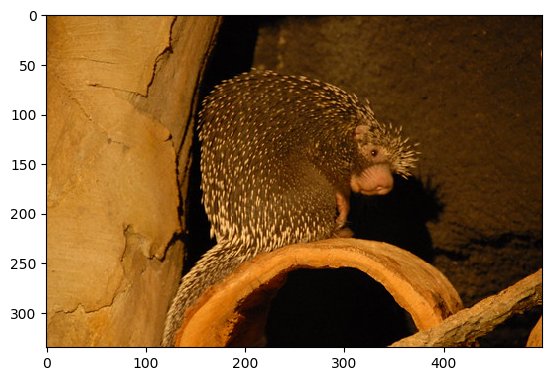

PyObject <matplotlib.image.AxesImage object at 0x7f80d4936950>

In [11]:
r = HTTP.request("GET", "https://farm1.static.flickr.com/201/496754650_999d27390c.jpg")
img = PyImage.open(r.body)
PyImage.show(img)

In [4]:
function foo(x::String)::String
    x + ": foo!"
end

typeof(foo)

typeof(foo)

In [28]:
using Match

abstract type Train end
abstract type Valid end

# 型マッチングを使う場合はシングルトン型の合併型を引数をとる
function foo(mode::Union{Type{Train}, Type{Valid}})
    @match mode begin
        t::Type{Train} => "訓練モード"
        v::Type{Valid} => "検証モード"
    end
end

foo(Train)

"訓練モード"

In [29]:
foo(Valid)

"検証モード"

In [34]:
TrainOrValid = Union{Type{Train}, Type{Valid}}
foo(TrainOrValid)

MethodError: MethodError: no method matching foo(::Type{Union{Type{Train}, Type{Valid}}})
Closest candidates are:
  foo(!Matched::String) at In[4]:2
  foo(!Matched::Union{Train, Valid}) at In[17]:7
  foo(!Matched::Union{Type{Train}, Type{Valid}}) at In[28]:7